In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy import ndimage

In [12]:
tile = np.array(Image.open(r"C:\Users\Leina School\Desktop\Work Exp BDI\BDI-Nuclei_Segmentation\results\tissue_tile.jpg"))

In [111]:
tile_image = Image.fromarray(tile)
tile_image.show()

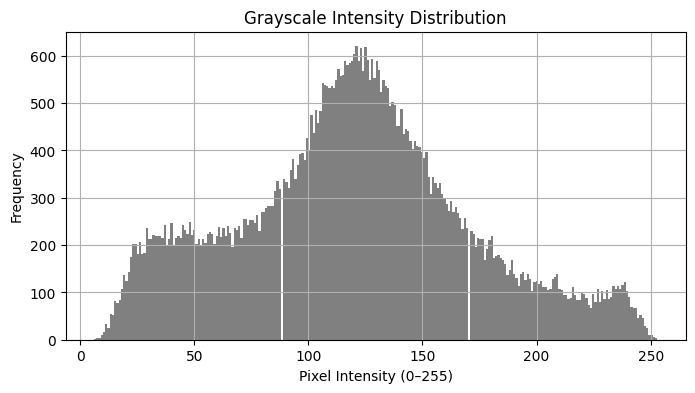

In [107]:
# Convert NumPy array to PIL Image to change to greyscale
grey_tile = tile_image.convert("L")
grey_tile.show()

# Convert greyscale image back to NumPy array
grey_array = np.array(grey_tile)

plt.figure(figsize=(8, 4))
plt.hist(grey_array.ravel(), bins=250, color='gray')  # .ravel() flattens the array
plt.title("Grayscale Intensity Distribution")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [108]:
# Load the image in RGB


# Split into raw channels
r, g, b = cv2.split(tile)


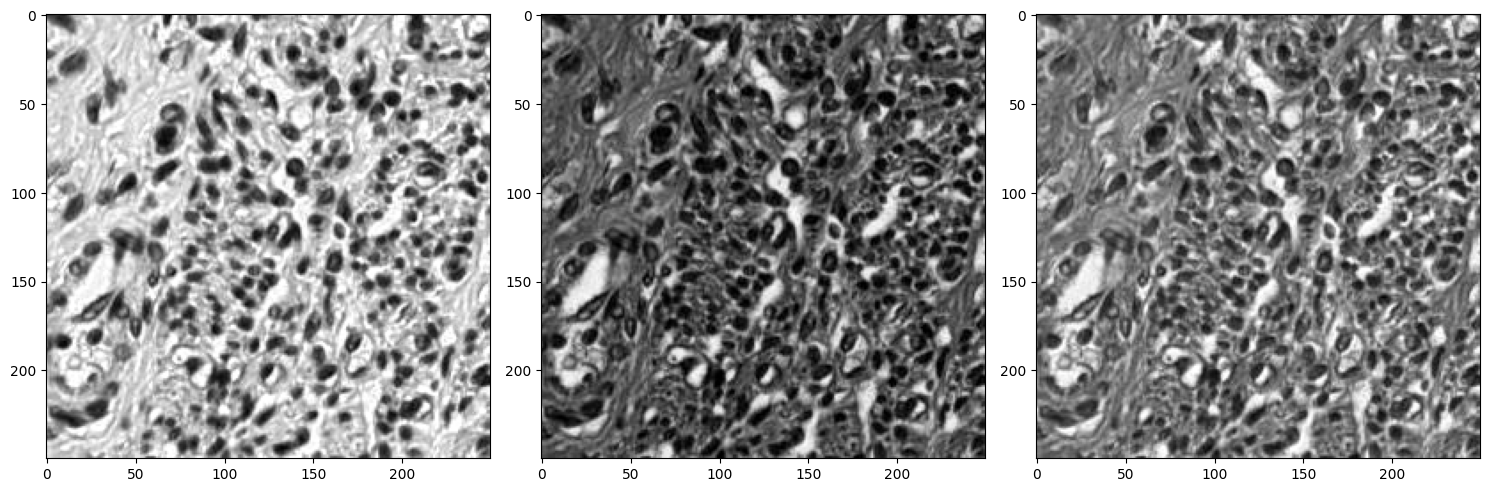

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(r, cmap='grey')
axs[1].imshow(g, cmap='grey')
axs[2].imshow(b, cmap='grey')
plt.tight_layout()
plt.show()

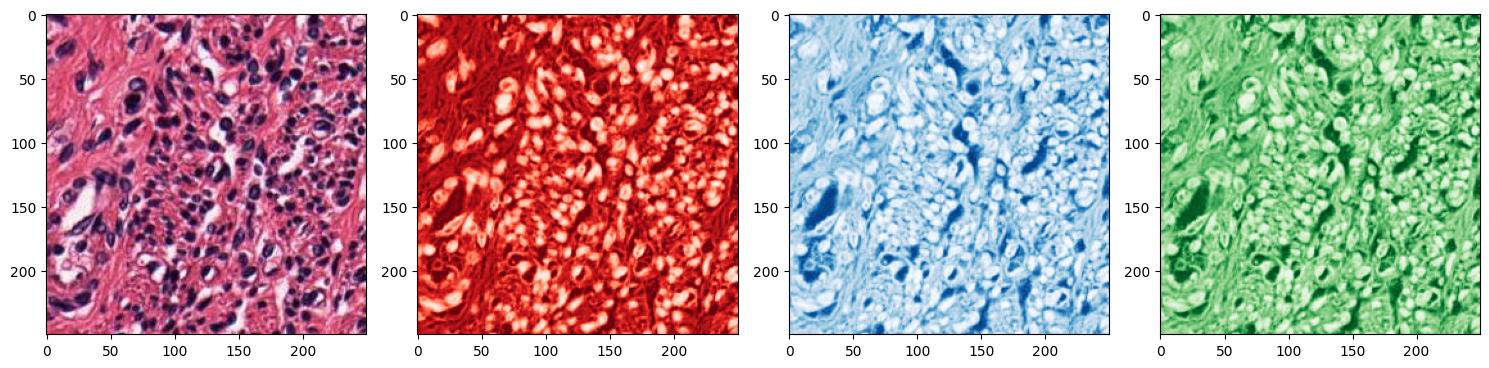

In [110]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(tile)
axs[1].imshow(r, cmap='Reds')
axs[2].imshow(g, cmap='Blues')
axs[3].imshow(b, cmap='Greens')
plt.tight_layout()
plt.show()

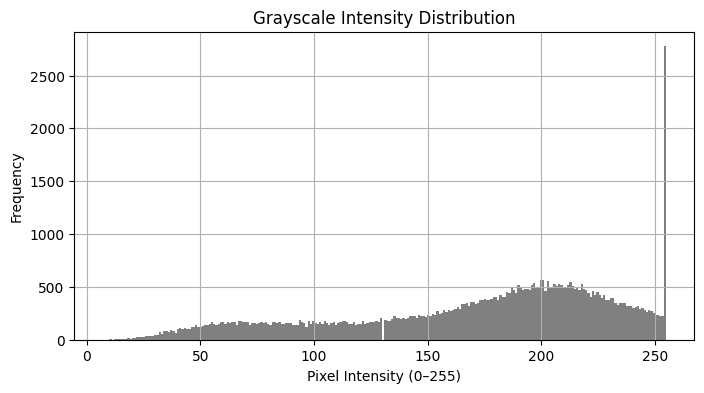

In [ ]:


# Convert greyscale image back to NumPy array
r = np.array(r)

plt.figure(figsize=(8, 4))
plt.hist(r.ravel(), bins=250, color='gray')  # .ravel() flattens the array
plt.title("Grayscale Intensity Distribution")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
r_channel = np.where(r >= 100, 255, 0).astype(np.uint8)
invert_r_channel = 255 - r_channel
r_image = Image.fromarray(r_channel)
r_image.show() #point of comparison

In [ ]:
# format cellSAM mask for comparison with r_channel tile verson later
mask = np.array(Image.open(r"C:\Users\Leina School\Desktop\Work Exp BDI\BDI-Nuclei_Segmentation\results\mask.jpg"))
binary_mask = np.where(mask >= 100, 255, 0).astype(np.uint8)
#print(binary_mask)
#inverted_img = Image.fromarray(binary_mask)
#inverted_img.show() # inverted cellSAM mask
bool_mask = binary_mask.astype(bool)
print(bool_mask)

x = Image.fromarray(bool_mask)
x.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
#dilate
r_img_arr = np.array(r_image)
bool_img = r_img_arr.astype(bool)

bool_invert_r_channel = invert_r_channel.astype(bool)

dilated_img = ndimage.binary_dilation(bool_invert_r_channel, iterations=1)
print(dilated_img)

y = Image.fromarray(dilated_img)
y.show()

[[ True  True  True ... False  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True False]
 [False False False ... False False False]]


In [104]:
def dice_coefficient_np(set1, set2):
    set1 = np.array(set1)
    set2 = np.array(set2)
    intersection = np.sum(np.logical_and(set1, set2))
    return 2. * intersection / (np.sum(set1) + np.sum(set2))

In [105]:
dice_coefficient_np(bool_mask, dilated_img)

np.float64(0.3894898406665692)